In [1]:
%%capture
!pip install cartopy
!pip install netCDF4

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import seaborn as sns
from netCDF4 import Dataset
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.colors as mcolors
import datetime

In [ ]:
# 1. Download the updated VIIRS data from here: https://firms.modaps.eosdis.nasa.gov/active_fire/
# 2. Save the downloaded file to your local directory.
# 3. Update the path in the 'pd.read_csv' function to the location of your downloaded file in .txt format.

In [7]:
# Load the data
fires = pd.read_csv("/content/SUOMI_VIIRS_C2_Global_7d.csv")
# I downloded VIIRS data of past 7 days

# Define the grid
coverage = [-180.0, -90.0, 180.0, 90.0]
grid_size = 1.0
num_points_x = int((coverage[2] - coverage[0]) / grid_size)
num_points_y = int((coverage[3] - coverage[1]) / grid_size)

# Create the meshgrid
nx = complex(0, num_points_x)
ny = complex(0, num_points_y)
Xnew, Ynew = np.mgrid[coverage[0]:coverage[2]:nx, coverage[1]:coverage[3]:ny]


In [8]:
fires.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,-29.65553,30.11223,298.16,0.58,0.70,2024-07-04,1.0,N,nominal,2.0NRT,280.43,1.17,N
1,-29.60702,27.33141,297.56,0.40,0.60,2024-07-04,1.0,N,nominal,2.0NRT,276.20,0.52,N
2,-29.78747,29.80731,329.93,0.56,0.69,2024-07-04,1.0,N,nominal,2.0NRT,283.68,4.47,N
3,-29.78779,29.81315,309.13,0.56,0.69,2024-07-04,1.0,N,nominal,2.0NRT,281.99,2.59,N
4,-29.79386,29.80531,314.54,0.56,0.69,2024-07-04,1.0,N,nominal,2.0NRT,278.78,4.47,N


In [12]:
# Populate the fire count array
fire_count = np.zeros([num_points_x, num_points_y])
for i, lon in enumerate(fires['longitude']):
    lat = fires['latitude'][i]
    adjlat = (lat + 90) / grid_size
    adjlon = (lon + 180) / grid_size
    latbin = int(adjlat)
    lonbin = int(adjlon)
    fire_count[lonbin, latbin] += 1

# Replace zeros with NaN
fire_count[fire_count == 0] = np.nan

In [18]:
# Define the color map
cmap = plt.cm.get_cmap("hot")
norm = mcolors.Normalize(vmin=0, vmax=40)

<ipython-input-18-ab24c9118f7e>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("hot")


In [24]:
# Add a beautiful basemap
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

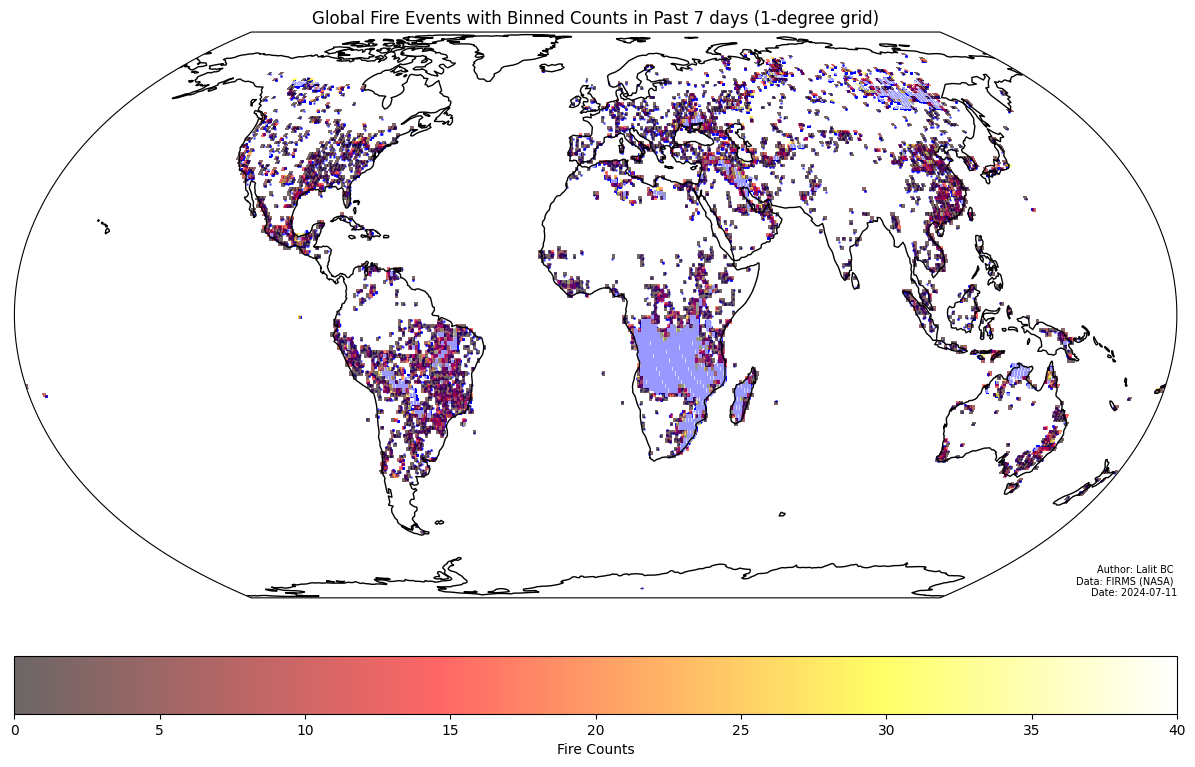

In [30]:
# Plot the data
fig, ax = plt.subplots(figsize=[15, 15], subplot_kw={'projection': ccrs.EqualEarth(central_longitude=0.0)})

# Plot the scatter data
sc = ax.scatter(fires['longitude'], fires['latitude'], s=1, transform=ccrs.PlateCarree(), color='blue', alpha=0.5, label='Fire Events')

# Plot the pcolormesh data
pcm = ax.pcolormesh(Xnew, Ynew, fire_count, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), alpha=0.6)

# Add color bar
cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Fire Counts')

# Set global and coastlines
ax.set_global()
ax.coastlines()

# Add title
plt.title('Global Fire Events with Binned Counts in Past 7 days (1-degree grid)')

# Add annotation for author and date in the bottom right
author_text = f'Author: Lalit BC \nData: FIRMS (NASA) \nDate: {datetime.date.today().strftime("%Y-%m-%d")}'
plt.annotate(author_text, xy=(1, 0), xycoords='axes fraction', fontsize=7, ha='right', va='bottom')

# Save the figure with high resolution and transparency
plt.savefig('global_fire_events.png', dpi=300, bbox_inches='tight', transparent=True)

# Display the plot
plt.show()